In [1]:
import pickle

with open('data/graph_sh_conn.pkl', 'rb') as f:
    transport_relation = pickle.load(f)
transport_relation

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]], shape=(288, 288))

# 站点关联整理

In [2]:
"""
将transport_relation转换成一个包含二元祖的列表,
每个火车的id赋值为0~79,
一个二元组代表两个站点之间有关联
"""
transport_relation_lis = list()
for x in range(80):
    for y in range(80):
        if x < y and int(transport_relation[x][y]) == 1:
                transport_relation_lis.append((x, y))
            
transport_relation_lis

[(0, 1),
 (1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (4, 56),
 (5, 6),
 (5, 57),
 (6, 7),
 (6, 59),
 (7, 8),
 (7, 59),
 (8, 9),
 (9, 10),
 (9, 36),
 (10, 11),
 (10, 37),
 (11, 12),
 (12, 13),
 (12, 37),
 (12, 38),
 (13, 14),
 (14, 15),
 (14, 37),
 (15, 16),
 (15, 65),
 (15, 66),
 (16, 17),
 (17, 18),
 (18, 19),
 (19, 20),
 (20, 21),
 (21, 22),
 (22, 23),
 (23, 24),
 (24, 25),
 (25, 26),
 (26, 27),
 (28, 29),
 (29, 30),
 (30, 31),
 (31, 32),
 (32, 33),
 (33, 34),
 (34, 35),
 (34, 61),
 (34, 62),
 (35, 36),
 (36, 37),
 (38, 39),
 (39, 40),
 (40, 41),
 (41, 42),
 (42, 43),
 (43, 44),
 (44, 45),
 (45, 46),
 (46, 47),
 (47, 48),
 (48, 49),
 (49, 50),
 (50, 51),
 (51, 52),
 (52, 53),
 (53, 54),
 (54, 55),
 (56, 57),
 (57, 58),
 (58, 59),
 (59, 60),
 (60, 61),
 (62, 63),
 (63, 64),
 (64, 65),
 (66, 67),
 (67, 68),
 (68, 69),
 (69, 70),
 (70, 71),
 (71, 72),
 (72, 73),
 (73, 74),
 (74, 75),
 (75, 76),
 (76, 77),
 (77, 78),
 (78, 79)]

In [3]:
transport_relation[0][0]

np.float64(1.0)

In [4]:
import networkx as nx
transportation_G = nx.Graph()

In [5]:
transportation_G.add_edges_from(transport_relation_lis)

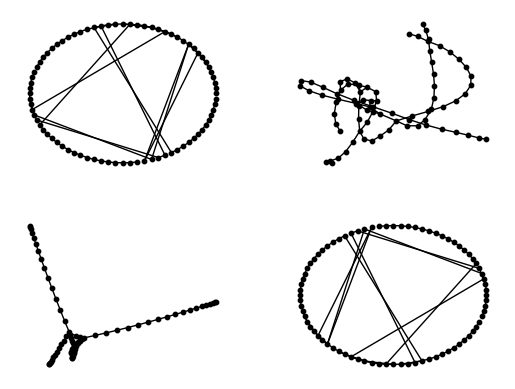

In [6]:
import matplotlib.pyplot as plt

options = {
    'node_color': 'black',
    'node_size': 10,
    'width': 1
}

subax1 = plt.subplot(221)
nx.draw_circular(transportation_G, **options)

subax2 = plt.subplot(222)
nx.draw(transportation_G, **options)

subax3 = plt.subplot(223)
nx.draw_spectral(transportation_G, **options)

subax4 = plt.subplot(224)
nx.draw_shell(transportation_G, **options)

In [7]:
G = nx.MultiDiGraph()

# 

In [8]:
with open('data/train.pkl', 'rb') as f:
    data = pickle.load(f)

In [9]:
data['xtime'][0]

array(['2016-07-01T05:30:00.000000000', '2016-07-01T05:45:00.000000000',
       '2016-07-01T06:00:00.000000000', '2016-07-01T06:15:00.000000000'],
      dtype='datetime64[ns]')

In [10]:
data['x'][0]

array([[[  0., 116.],
        [  1.,  27.],
        [  0., 154.],
        ...,
        [  0.,   0.],
        [  0.,   0.],
        [  0.,   5.]],

       [[  1., 237.],
        [  0.,  53.],
        [  1., 284.],
        ...,
        [  1., 103.],
        [  0.,  15.],
        [  0.,  24.]],

       [[ 44., 382.],
        [ 14.,  73.],
        [ 48., 345.],
        ...,
        [  1.,  96.],
        [  0.,  17.],
        [  0.,  19.]],

       [[ 78., 698.],
        [ 11., 111.],
        [ 67., 563.],
        ...,
        [  0.,  98.],
        [  0.,  28.],
        [  0.,  34.]]], shape=(4, 288, 2))

# 上海地铁线路图绘制

In [11]:
# 读取地铁站点JSON数据
import json

with open('data/station_info_json.json', 'r', encoding='utf-8') as f:
    metro_data = json.load(f)

# 查看数据结构
line_list = metro_data['content']
print(f"上海地铁线路总数: {len(line_list)}")
print(f"第一条线路: {line_list[0]['line_name']}")
print(f"第一条线路站点数: {len(line_list[0]['stops'])}")

上海地铁线路总数: 40
第一条线路: 地铁5号线(莘庄-奉贤新城)
第一条线路站点数: 15


In [30]:
# 查看Excel数据结构
import pandas as pd

df = pd.read_excel("data/站台.xlsx")
print(f"数据形状: {df.shape}")
print(f"\n列名: {df.columns.tolist()}")
print(f"\n前5行数据:")
print(df.head())
print(f"\n线路列表: {df['线路'].unique().tolist()}")

数据形状: (375, 9)

列名: ['站台名称', '线路', '站台序号', 'openstreetmap纬度', 'openstreetmap纬度.1', 'googlemap纬度', 'googlemap经度', '百度地图纬度', '百度地图经度']

前5行数据:
   站台名称  线路  站台序号  openstreetmap纬度  openstreetmap纬度.1  googlemap纬度  \
0  宝安公路   1     1        31.371644         121.426297    31.369858   
1   漕宝路   1     2        31.170181         121.430410    31.168308   
2   常熟路   1     3        31.215580         121.445584    31.213704   
3   富锦路   1     4        31.394206         121.419948    31.392434   
4  共富新村   1     5        31.356997         121.429383    31.355205   

   googlemap经度     百度地图纬度      百度地图经度  
0   121.430942  31.376207  121.437357  
1   121.435039  31.174651  121.441431  
2   121.450182  31.219964  121.456628  
3   121.424605  31.398683  121.431030  
4   121.434029  31.361557  121.440458  

线路列表: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16]


In [38]:
# 提取所有站点和线路信息（使用JSON数据）
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'STHeiti']  # macOS和其他系统
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 准备数据结构
all_stations = {}  # 存储所有站点: {station_name: (x, y)}
lines_info = []    # 存储线路信息: [(line_name, [(x1,y1), (x2,y2), ...]), ...]

# 遍历所有线路
for line in line_list:
    line_name = line['line_name']
    stops = line['stops']
    
    # 只处理实际运营的站点（is_practical=1）或者所有站点
    line_coords = []
    
    for stop in stops:
        station_name = stop['name']
        x = stop['x']
        y = stop['y']
        
        # 记录站点位置
        if station_name not in all_stations:
            all_stations[station_name] = (x, y)
        
        line_coords.append((x, y))
    
    if line_coords:
        lines_info.append((line_name, line_coords))

print(f"总站点数: {len(all_stations)}")
print(f"总线路数: {len(lines_info)}")
print(f"前5条线路: {[line_name for line_name, _ in lines_info[:5]]}")

总站点数: 344
总线路数: 40
前5条线路: ['地铁5号线(莘庄-奉贤新城)', '轨道交通浦江线(沈杜公路-汇臻路)', '地铁5号线(奉贤新城-莘庄)', '地铁8号线(市光路-沈杜公路)', '地铁13号线(金运路-张江路)']


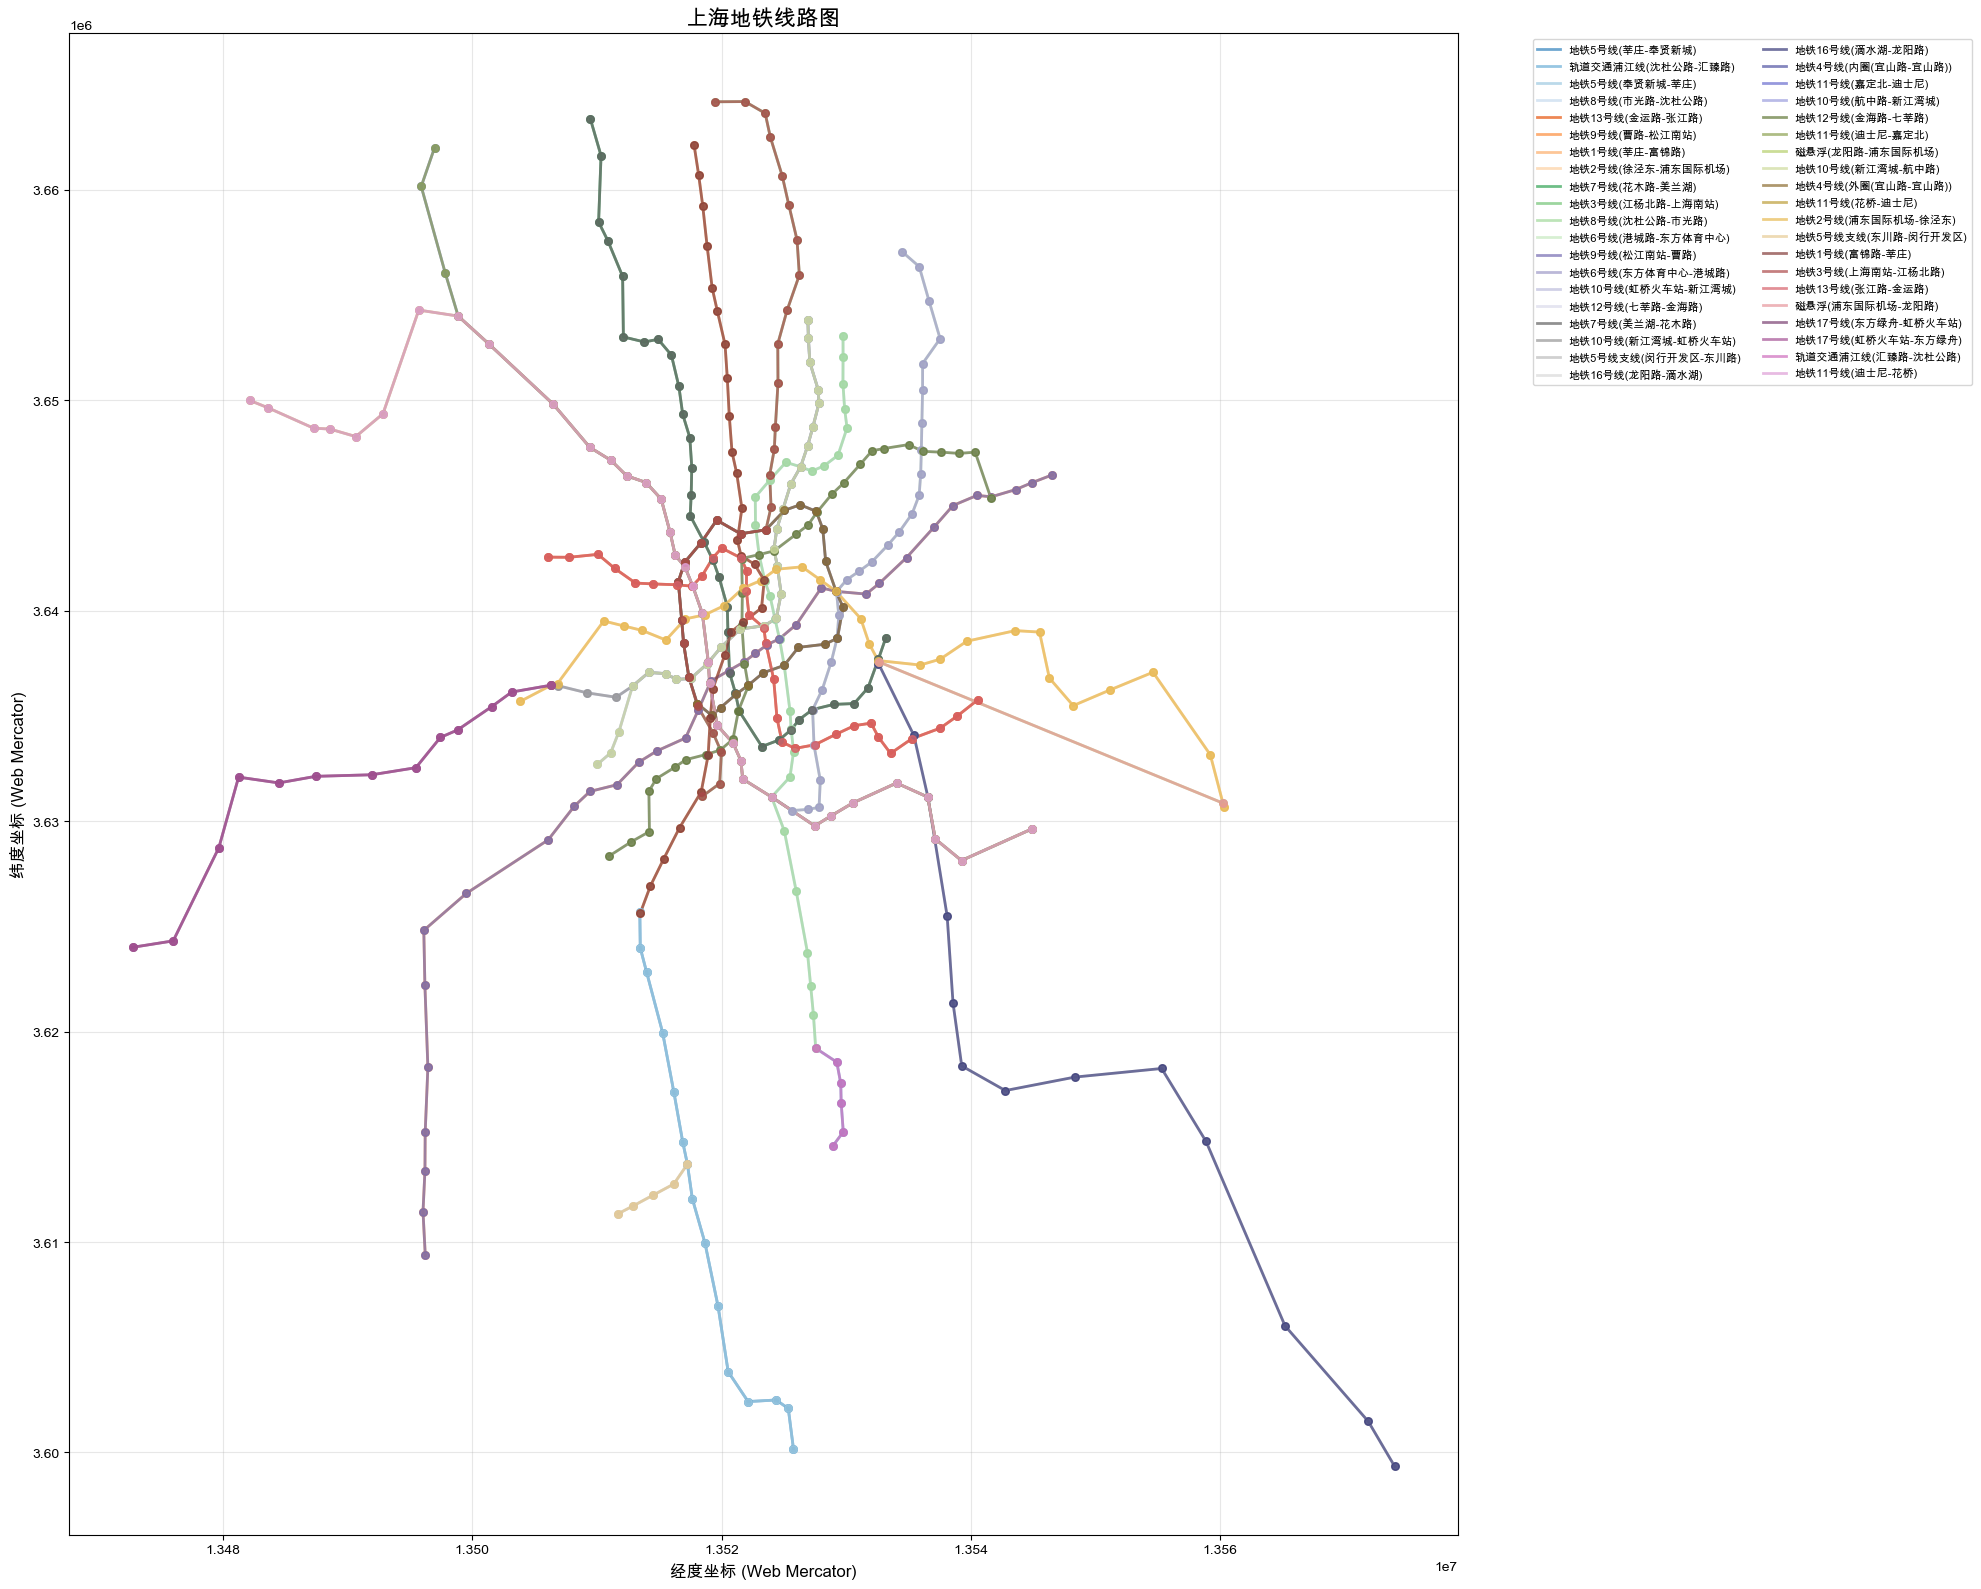

已绘制 40 条地铁线路


In [39]:
# 绘制上海地铁线路图
fig, ax = plt.subplots(figsize=(20, 16))

# 生成不同的颜色
colors = plt.cm.tab20c(range(20))  # 使用tab20c色系
additional_colors = plt.cm.tab20b(range(20))  # 补充更多颜色
all_colors = list(colors) + list(additional_colors)

# 绘制每条线路
for idx, (line_name, coords) in enumerate(lines_info):
    color = all_colors[idx % len(all_colors)]
    
    # 提取x和y坐标
    xs = [coord[0] for coord in coords]
    ys = [coord[1] for coord in coords]
    
    # 绘制线路
    ax.plot(xs, ys, '-', linewidth=2, color=color, alpha=0.7, label=line_name)
    
    # 绘制站点
    ax.scatter(xs, ys, s=30, c=[color], alpha=0.8, zorder=5)

# 设置图表属性
ax.set_xlabel('经度坐标 (Web Mercator)', fontsize=12)
ax.set_ylabel('纬度坐标 (Web Mercator)', fontsize=12)
ax.set_title('上海地铁线路图', fontsize=16, fontweight='bold')
ax.grid(True, alpha=0.3)

# 添加图例（放在图外右侧）
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, ncol=2)

plt.tight_layout()
plt.show()

print(f"已绘制 {len(lines_info)} 条地铁线路")

去重后的线路数: 18


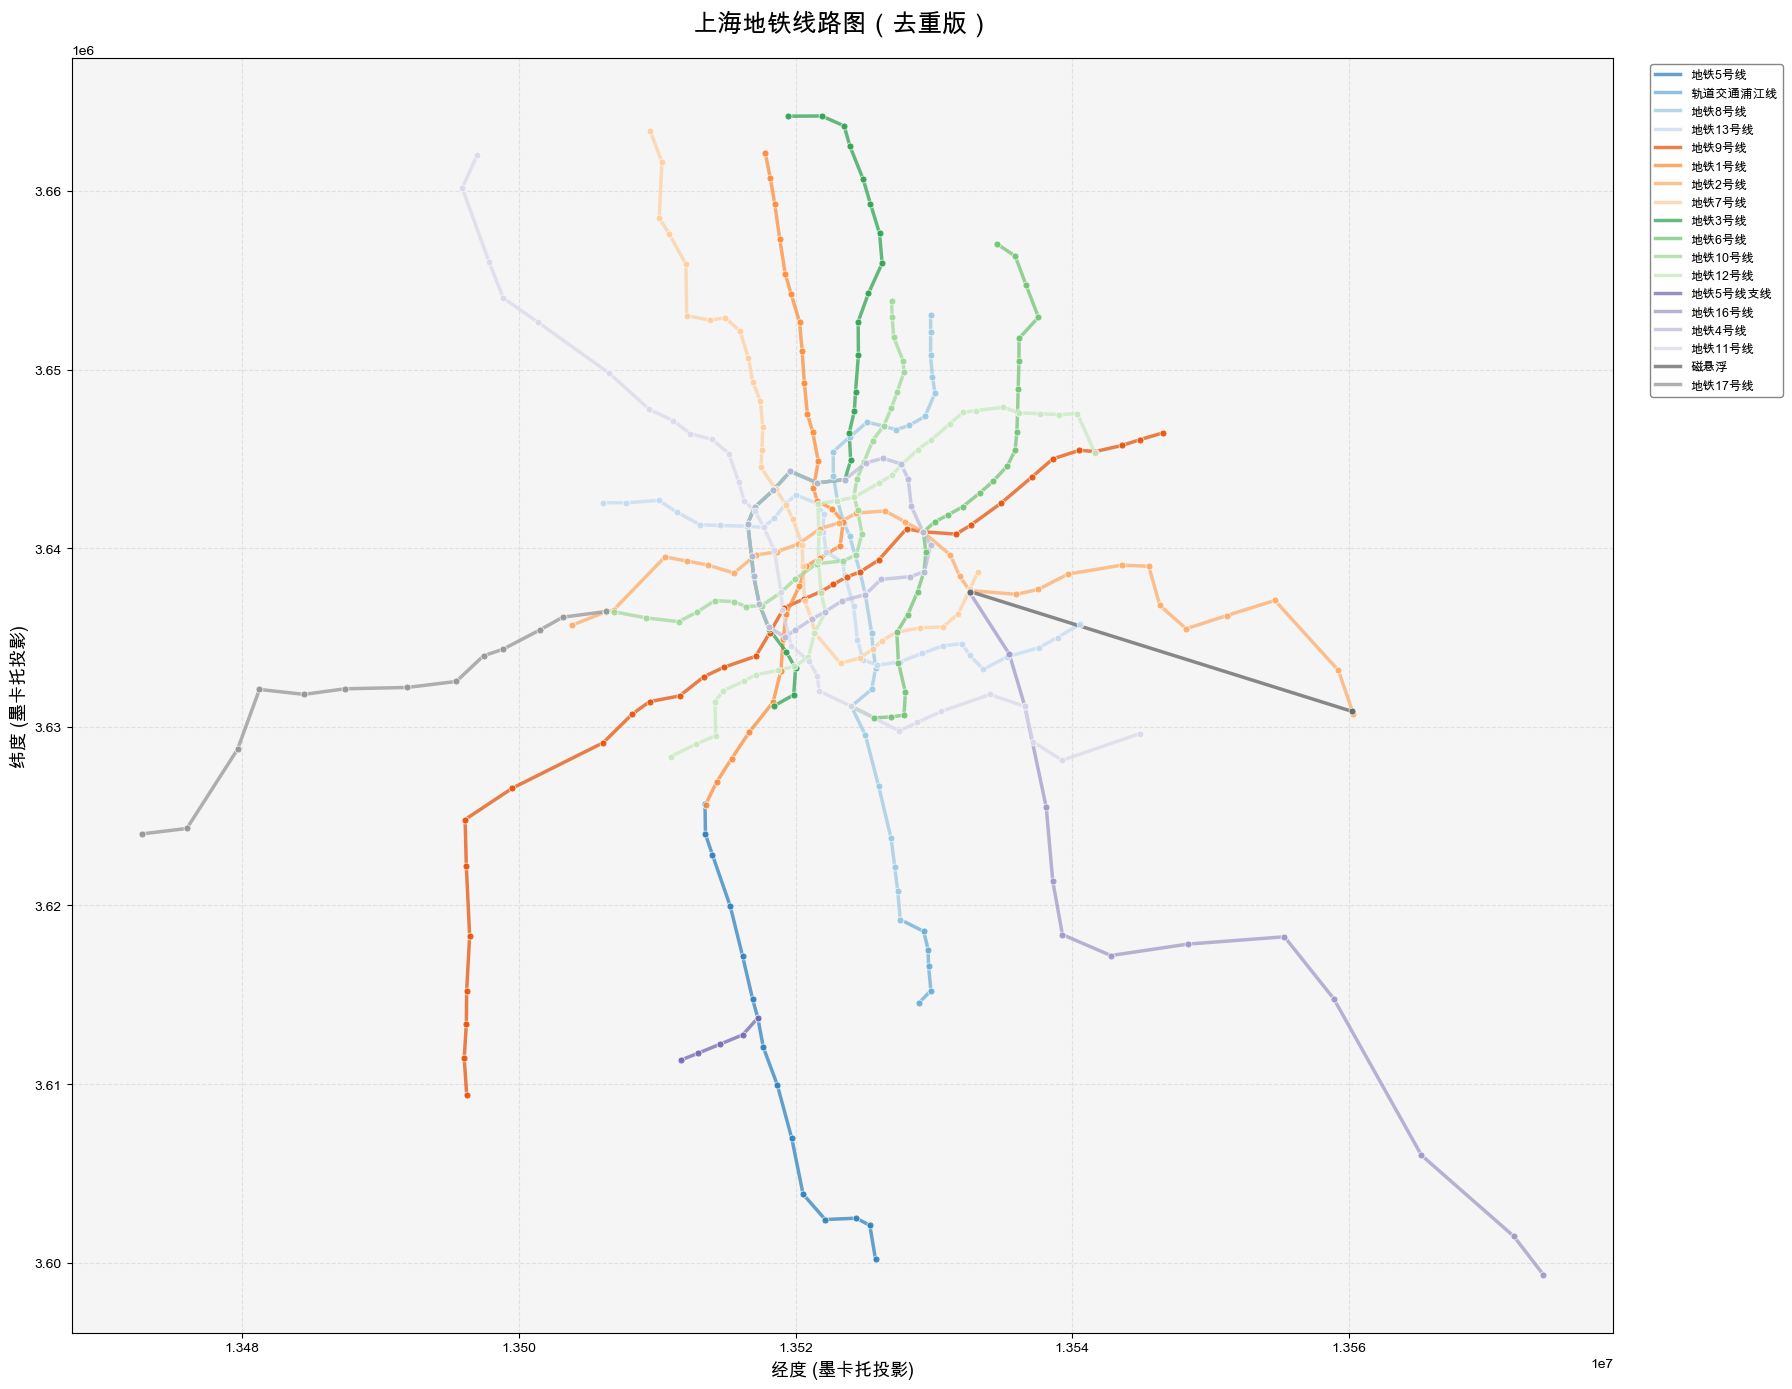

In [40]:
# 绘制简化版地铁线路图（只显示主要线路，不显示往返重复）
fig, ax = plt.subplots(figsize=(18, 14))

# 过滤掉往返重复的线路，只保留每条线路的一个方向
unique_lines = {}
for line_name, coords in lines_info:
    # 提取线路基本名称（去掉方向信息）
    base_name = line_name.split('(')[0] if '(' in line_name else line_name
    
    # 只保留第一次出现的线路
    if base_name not in unique_lines:
        unique_lines[base_name] = coords

print(f"去重后的线路数: {len(unique_lines)}")

# 绘制唯一线路
for idx, (line_name, coords) in enumerate(unique_lines.items()):
    color = all_colors[idx % len(all_colors)]
    
    xs = [coord[0] for coord in coords]
    ys = [coord[1] for coord in coords]
    
    # 绘制线路
    ax.plot(xs, ys, '-', linewidth=2.5, color=color, alpha=0.75, label=line_name)
    
    # 绘制站点
    ax.scatter(xs, ys, s=25, c=[color], alpha=0.9, zorder=5, edgecolors='white', linewidths=0.5)

# 设置图表属性
ax.set_xlabel('经度 (墨卡托投影)', fontsize=13)
ax.set_ylabel('纬度 (墨卡托投影)', fontsize=13)
ax.set_title('上海地铁线路图（去重版）', fontsize=18, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_facecolor('#f5f5f5')

# 添加图例
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9, ncol=1, 
          framealpha=0.95, edgecolor='gray')

plt.tight_layout()
plt.show()

# 将地铁线路图叠加在上海地图上

# 绘制精美的地铁网络可视化（类似参考图）

In [41]:
# 方法3: 使用Plotly创建交互式精美可视化
import plotly.graph_objects as go
import numpy as np

# 转换坐标函数
def bd_mercator_to_wgs84_simple(x, y):
    """百度墨卡托坐标转WGS84"""
    lng = x / 20037508.34 * 180
    lat = y / 20037508.34 * 180
    lat = 180 / np.pi * (2 * np.arctan(np.exp(lat * np.pi / 180)) - np.pi / 2)
    # 百度坐标系偏移校正
    lng = lng - 0.0065
    lat = lat - 0.006
    return lat, lng

# 准备数据
unique_lines_plotly = {}
for line_name, coords in lines_info:
    base_name = line_name.split('(')[0] if '(' in line_name else line_name
    if base_name not in unique_lines_plotly:
        unique_lines_plotly[base_name] = coords

# 统计每个站点被经过的次数（作为站点重要性的指标）
station_importance = {}
for line_name, coords in unique_lines_plotly.items():
    for coord in coords:
        coord_key = (round(coord[0]), round(coord[1]))
        station_importance[coord_key] = station_importance.get(coord_key, 0) + 1

# 定义颜色方案（更丰富的颜色）
plotly_colors = [
    '#E63946', '#F77F00', '#06FFA5', '#118AB2', '#073B4C',
    '#F72585', '#7209B7', '#3A0CA3', '#4361EE', '#4CC9F0',
    '#FF006E', '#FB5607', '#FFBE0B', '#8338EC', '#3A86FF',
    '#06D6A0', '#EF476F', '#FFD166', '#06A77D', '#8B5CF6'
]

# 创建Plotly图形
fig = go.Figure()

# 添加地图底图
fig.update_layout(
    mapbox=dict(
        style='carto-positron',  # 浅色地图样式
        zoom=10,
        center=dict(
            lat=31.23,  # 上海中心纬度
            lon=121.47  # 上海中心经度
        )
    ),
    showlegend=True,
    height=900,
    width=1400,
    title=dict(
        text='上海地铁网络图',
        font=dict(size=24, color='#2C3E50'),
        x=0.5,
        xanchor='center'
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

# 绘制每条线路
for idx, (line_name, coords) in enumerate(unique_lines_plotly.items()):
    # 转换坐标
    lats, lons = [], []
    for x, y in coords:
        lat, lon = bd_mercator_to_wgs84_simple(x, y)
        lats.append(lat)
        lons.append(lon)
    
    color = plotly_colors[idx % len(plotly_colors)]
    
    # 添加线路轨迹
    fig.add_trace(go.Scattermapbox(
        lat=lats,
        lon=lons,
        mode='lines',
        line=dict(width=3, color=color),
        name=line_name,
        hovertemplate=f'<b>{line_name}</b><br>纬度: %{{lat:.4f}}<br>经度: %{{lon:.4f}}<extra></extra>',
        showlegend=True
    ))

# 添加站点（根据重要性设置不同大小）
all_stations_plotly = {}
for line_name, coords in unique_lines_plotly.items():
    for coord in coords:
        coord_key = (round(coord[0]), round(coord[1]))
        if coord_key not in all_stations_plotly:
            all_stations_plotly[coord_key] = coord

station_lats, station_lons, station_sizes, station_colors = [], [], [], []
for coord_key, coord in all_stations_plotly.items():
    lat, lon = bd_mercator_to_wgs84_simple(coord[0], coord[1])
    station_lats.append(lat)
    station_lons.append(lon)
    # 根据重要性设置大小和颜色
    importance = station_importance.get(coord_key, 1)
    station_sizes.append(10)
    
    # 重要站点用不同颜色
    if importance > 3:
        station_colors.append('#E74C3C')  # 红色 - 重要换乘站
    elif importance > 2:
        station_colors.append('#F39C12')  # 橙色 - 换乘站
    else:
        station_colors.append('#3498DB')  # 蓝色 - 普通站

# 添加站点标记
fig.add_trace(go.Scattermapbox(
    lat=station_lats,
    lon=station_lons,
    mode='markers',
    marker=dict(
        size=station_sizes,
        color=station_colors,
        opacity=0.85
    ),
    name='地铁站点',
    hovertemplate='<b>地铁站点</b><br>线路数: %{marker.size}<br>纬度: %{lat:.4f}<br>经度: %{lon:.4f}<extra></extra>',
    showlegend=False
))

print(f"✓ 已创建Plotly交互式地图")
print(f"  - {len(unique_lines_plotly)} 条线路")
print(f"  - {len(all_stations_plotly)} 个站点")
print(f"  - 站点大小代表重要性（经过的线路数）")
fig.show()

✓ 已创建Plotly交互式地图
  - 18 条线路
  - 403 个站点
  - 站点大小代表重要性（经过的线路数）


/var/folders/0m/2sbyxxc10czg8dp3clzyzxym0000gn/T/ipykernel_28378/828162687.py:75: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

/var/folders/0m/2sbyxxc10czg8dp3clzyzxym0000gn/T/ipykernel_28378/828162687.py:111: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



✓ 已添加地图底图


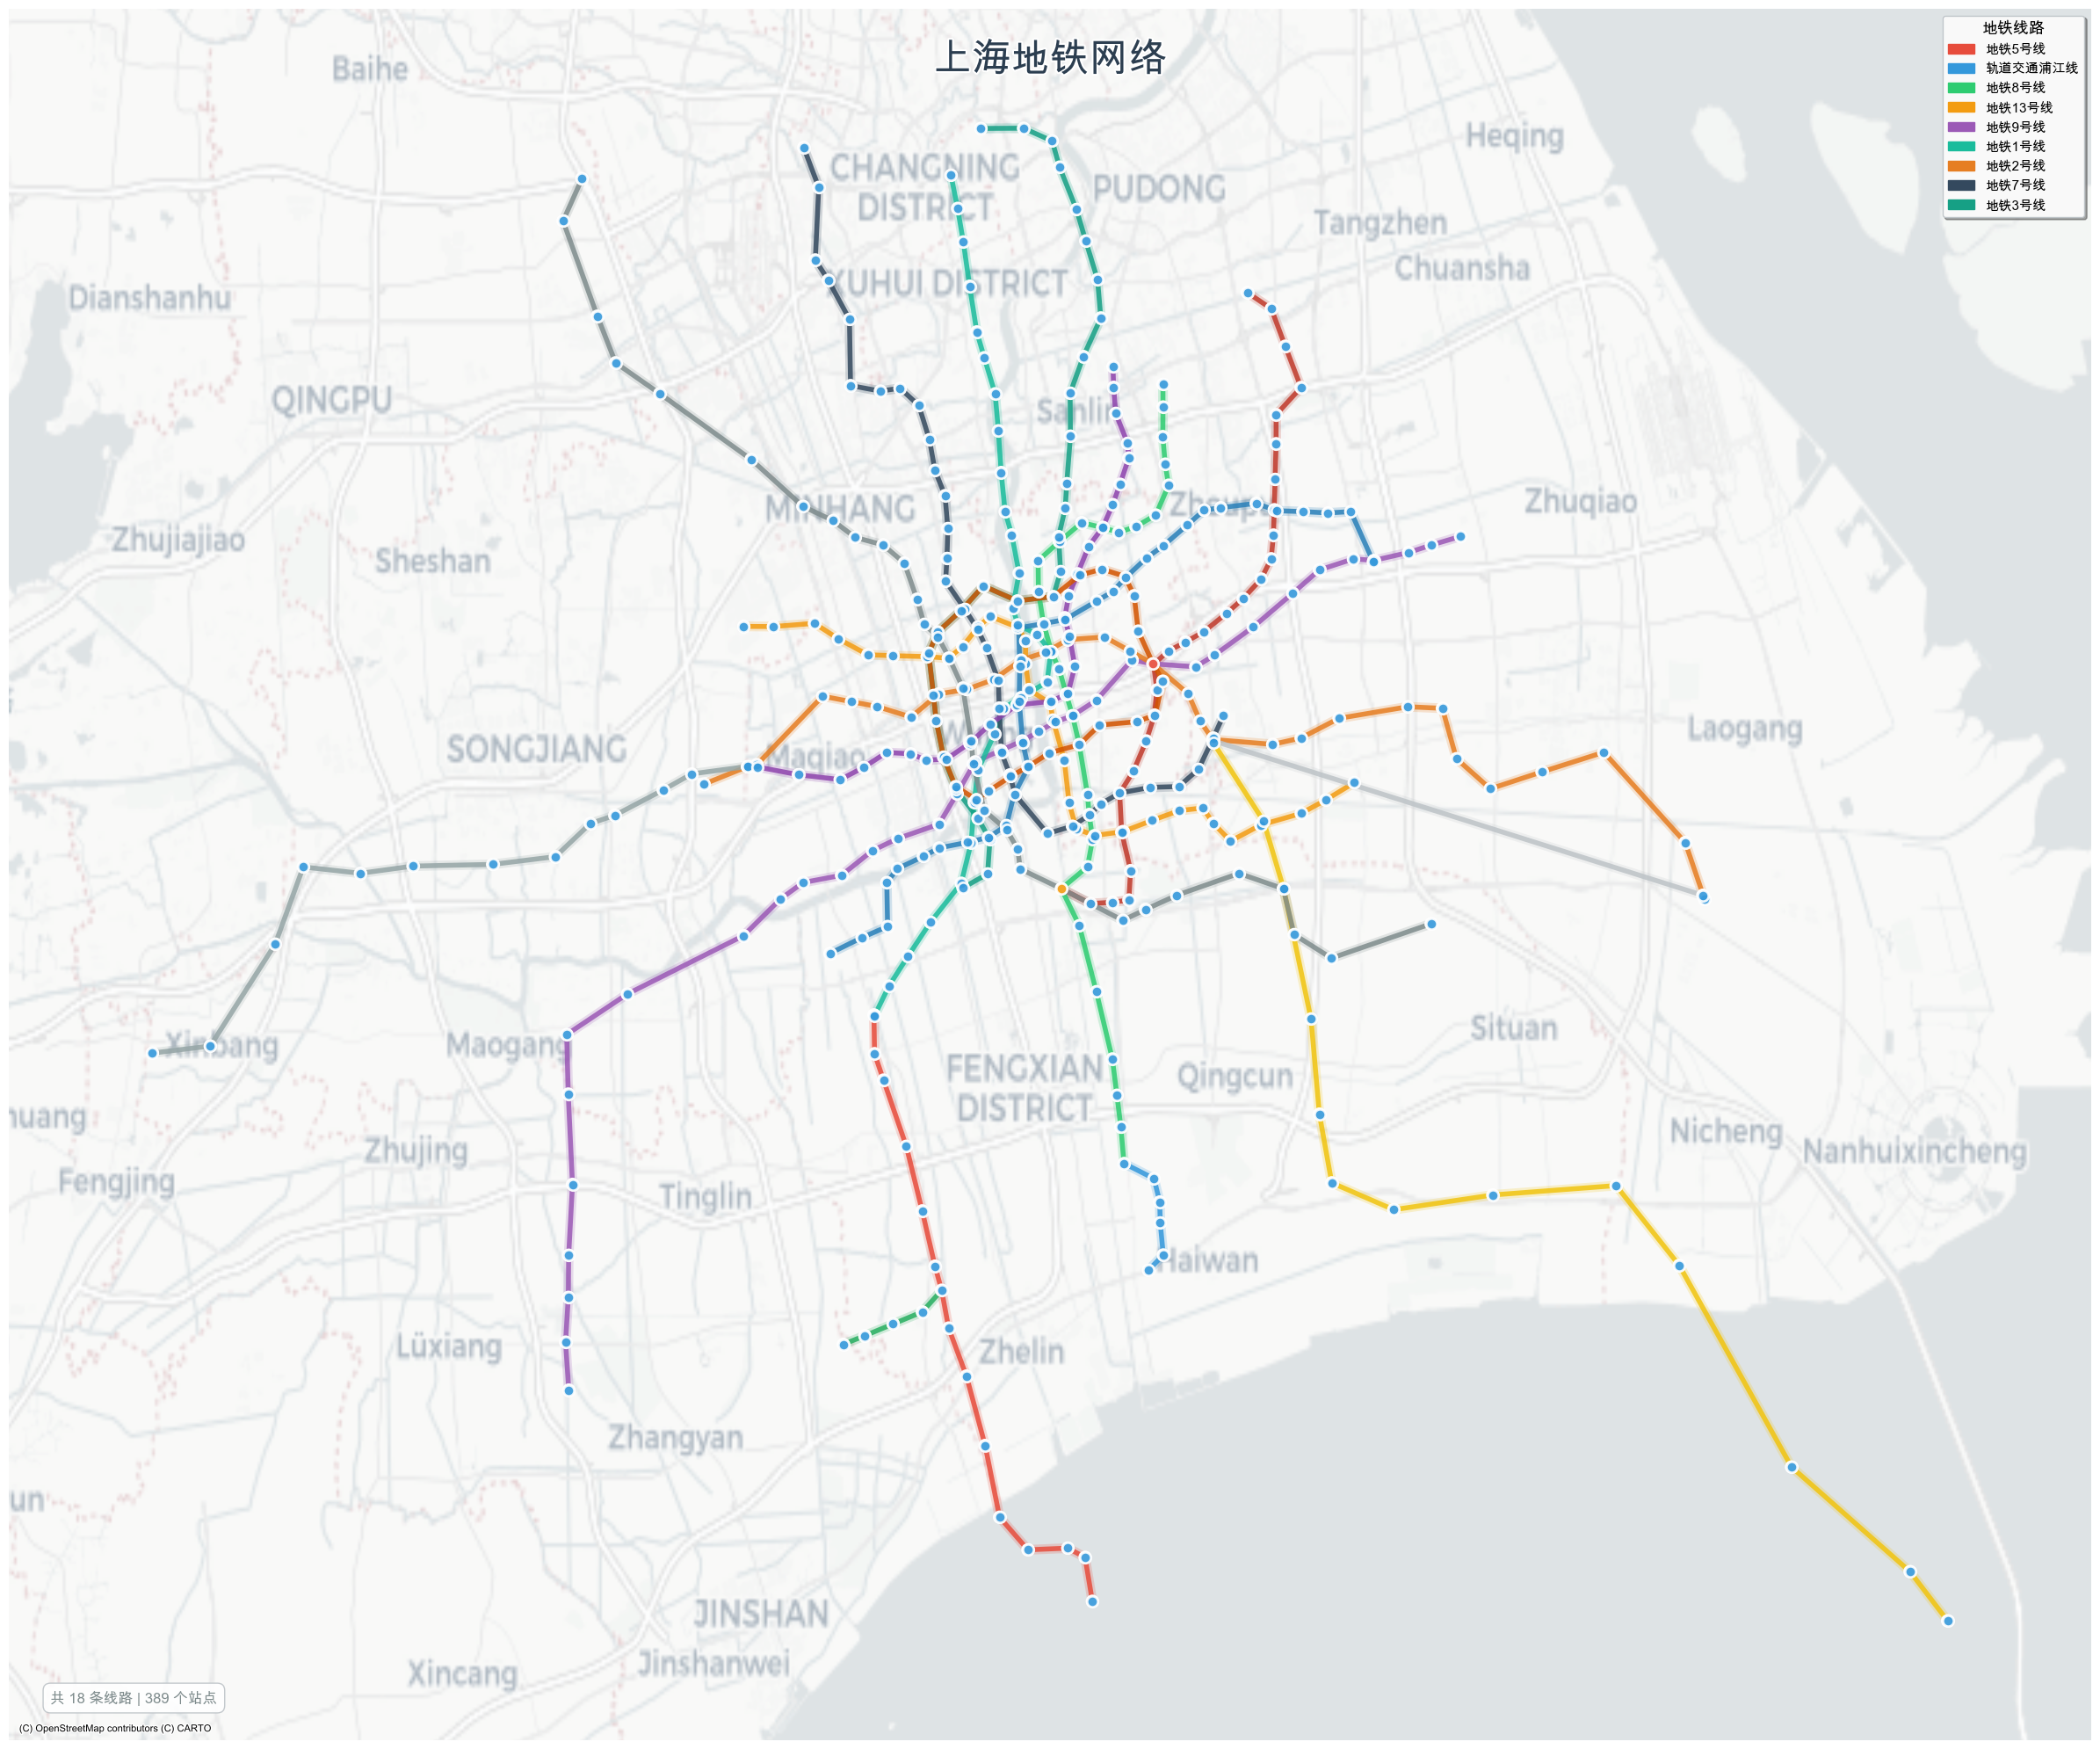

✓ 已绘制 18 条地铁线路，389 个站点


In [43]:
# 方法4: 使用matplotlib创建高质量静态可视化（类似参考图风格）
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import patheffects
import contextily as ctx

# 创建大尺寸图形
fig, ax = plt.subplots(figsize=(24, 20), dpi=100)

# 设置背景色
fig.patch.set_facecolor('white')
ax.set_facecolor('#F8F9FA')

# 准备数据
unique_lines_style = {}
for line_name, coords in lines_info:
    base_name = line_name.split('(')[0] if '(' in line_name else line_name
    if base_name not in unique_lines_style:
        unique_lines_style[base_name] = coords

# 统计站点重要性
station_freq = {}
station_coords_map = {}
for line_name, coords in unique_lines_style.items():
    for coord in coords:
        coord_key = (round(coord[0], -2), round(coord[1], -2))  # 四舍五入以合并相近站点
        station_freq[coord_key] = station_freq.get(coord_key, 0) + 1
        if coord_key not in station_coords_map:
            station_coords_map[coord_key] = coord

# 定义精美的颜色方案
metro_colors = [
    '#E74C3C', '#3498DB', '#2ECC71', '#F39C12', '#9B59B6',
    '#1ABC9C', '#E67E22', '#34495E', '#16A085', '#C0392B',
    '#8E44AD', '#2980B9', '#27AE60', '#F1C40F', '#D35400',
    '#7F8C8D', '#BDC3C7', '#95A5A6'
]

# 绘制每条线路
line_patches = []
for idx, (line_name, coords) in enumerate(unique_lines_style.items()):
    xs = [coord[0] for coord in coords]
    ys = [coord[1] for coord in coords]
    
    color = metro_colors[idx % len(metro_colors)]
    
    # 绘制线路（带阴影效果）
    line = ax.plot(xs, ys, '-', linewidth=4, color=color, 
                   alpha=0.85, zorder=10, solid_capstyle='round')[0]
    
    # 添加光晕效果
    ax.plot(xs, ys, '-', linewidth=8, color=color, 
            alpha=0.2, zorder=9, solid_capstyle='round')
    
    line_patches.append(mpatches.Patch(color=color, label=line_name))

# 绘制站点（根据重要性设置大小）
for coord_key, coord in station_coords_map.items():
    importance = station_freq[coord_key]
    # 站点大小与重要性成正比
    base_size = 80
    size = base_size
    
    # 绘制站点外圈（白色边框）
    ax.scatter(coord[0], coord[1], s=size*1.5, c='white', 
               alpha=0.95, zorder=20, edgecolors='none')
    
    # 绘制站点内圈（根据重要性着色）
    if importance > 3:
        color = '#E74C3C'  # 重要站点用红色
    elif importance > 2:
        color = '#F39C12'  # 次要站点用橙色
    else:
        color = '#3498DB'  # 普通站点用蓝色
    
    ax.scatter(coord[0], coord[1], s=size, c=color, 
               alpha=0.9, zorder=21, edgecolors='white', linewidths=2)

# 设置坐标范围
all_x = [coord[0] for coords in unique_lines_style.values() for coord in coords]
all_y = [coord[1] for coords in unique_lines_style.values() for coord in coords]
margin = 0.08
x_range = max(all_x) - min(all_x)
y_range = max(all_y) - min(all_y)
ax.set_xlim(min(all_x) - margin * x_range, max(all_x) + margin * x_range)
ax.set_ylim(min(all_y) - margin * y_range, max(all_y) + margin * y_range)

# 添加地图底图
try:
    ctx.add_basemap(ax, 
                    crs='EPSG:3857',
                    source=ctx.providers.CartoDB.Positron,  # 使用浅色地图
                    alpha=0.7,
                    zorder=1)
    print("✓ 已添加地图底图")
except Exception as e:
    print(f"⚠ 地图底图加载失败: {e}")
    # 添加网格作为备选
    ax.grid(True, alpha=0.1, linestyle='-', linewidth=0.5, color='gray', zorder=0)

# 移除坐标轴
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# 添加标题
title = ax.text(0.5, 0.98, '上海地铁网络', 
                transform=ax.transAxes,
                fontsize=32, fontweight='bold',
                ha='center', va='top',
                color='#2C3E50')
title.set_path_effects([patheffects.withStroke(linewidth=3, foreground='white')])

# 添加图例（优化布局）
legend = ax.legend(handles=line_patches[:9], 
                   loc='upper right',
                   fontsize=11,
                   frameon=True,
                   fancybox=True,
                   shadow=True,
                   framealpha=0.95,
                   edgecolor='#BDC3C7',
                   title='地铁线路',
                   title_fontsize=13)
legend.get_frame().set_facecolor('white')

# 添加说明文字
info_text = f"共 {len(unique_lines_style)} 条线路 | {len(station_coords_map)} 个站点"
ax.text(0.02, 0.02, info_text,
        transform=ax.transAxes,
        fontsize=12,
        ha='left', va='bottom',
        color='#7F8C8D',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                  alpha=0.9, edgecolor='#BDC3C7'))

plt.tight_layout()
plt.savefig("shanghai_map.png", dpi = 1200)
plt.show()

print(f"✓ 已绘制 {len(unique_lines_style)} 条地铁线路，{len(station_coords_map)} 个站点")